# Capstone 3 Notebook 2 Data wrangling

## 2.1 Introduction

This step focuses on collecting your data, organizing it, and making sure it's well defined. Paying attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, but it's important not to be overzealous in your cleaning before you've explored the data to better understand it.

### 2.1.1 Recap Of Data Science Problem

The purpose of this data science project is to come up with a classification model for loans that get approved on Lending Club (dataset available on https://data.world/jaypeedevlin/lending-club-loan-data-2007-11). Lenders on Lending Club suspect they may not be maximizing their profits, relative to what's optimal. They also do not have a strong sense of what borrower features matter the most in determining credit-worthiness. This project aims to build a classification model for potential borrowers based on various numerical and categorical data. This model will be used to provide guidance for banks and other moneylenders.

## 2.2 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import OneHotEncoder

from library.sb_utils import save_file

## 2.3 Objectives

There are some fundamental questions to resolve in this notebook before you move on.

* Do you think you may have the data you need to tackle the desired question?

* Have you identified the required target value?

* Do you have potentially useful features?

* Do you have any fundamental issues with the data?

## 2.4 Load the Lending Club Loan Data

In [2]:
# the supplied CSV data file is the raw_data directory
loan_data = pd.read_csv('../raw_data/lending_club_loans.csv', skiprows=1, low_memory=False)
# skip row 1 so pandas can parse the data properly.

We start with the following number of rows and columns:

In [3]:
loan_data.shape

(42538, 115)

Good first steps in auditing the data are the info method and displaying the first few records with head.

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(90), object(25)
memory usage: 37.3+ MB


In [5]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Also check the last few records with tail.

In [6]:
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42535,70686,70681.0,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42537,Total amount funded in policy code 2: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The last two rows are useless so we drop them.

In [7]:
loan_data = loan_data[:-2]

## 2.5 Examine Columns for Cleaning

### 2.5.1 Number Of Missing Values By Column

Count the number of missing values in each column and sort them.

In [8]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#mushroom_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([loan_data.isnull().sum(), 100 * loan_data.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by=['count','%'],ascending=False)

,count,%
mths_since_last_major_derog,42536,100.000000
annual_inc_joint,42536,100.000000
dti_joint,42536,100.000000
verification_status_joint,42536,100.000000
tot_coll_amt,42536,100.000000
...,...,...
last_fico_range_high,1,0.002351
last_fico_range_low,1,0.002351
policy_code,1,0.002351
application_type,1,0.002351


Drop the columns with more than half missing values.

In [9]:
count_columns = len(loan_data)
loan_data = loan_data.dropna(thresh=count_columns/2,axis=1) # drop columns with more than half missing values

Also drop the useless columns `url` and `desc`.

In [10]:
loan_data = loan_data.drop(['url','desc'],axis=1) # drop these useless columns

## 2.6 Exploratory Data Analysis

We have loaded our data and taken a quick glance at our categorical and numeric features. We need to further investigate the meaning of the feature represented by each column so as to avoid making mistakes in the data analysis and modeling process.

We will use the data dictionary LendingClub provides to familiarize ourselves with the columns and what each one represents in the dataset. We'll create a DataFrame to contain column names, data types, first row values, and descriptions (from the data dictionary).

We load that dictionary and take a look.

In [11]:
data_dict = pd.read_csv('../raw_data/LCDataDictionary.csv') # loading the data dictionary

In [12]:
data_dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


First let's rename `LoanStatNew` to `feature` and `Description` to `description`.

In [13]:
data_dict = data_dict.rename(columns={'LoanStatNew': 'feature', 'Description': 'description'})

Now that we’ve got the data dictionary loaded, let’s join the first row of `loan_data` to the `data_dict` DataFrame to give us a `feature_desc` DataFrame with the following columns:

* `feature` — contains the column names of `loan_data`.
* `dtype` — contains the data types of the `loan_data` columns.
* `first_value` — contains the values of the first row in `loan_data`.
* `description` — explains what each column in `loan_data` represents.

In [14]:
loan_data_dtypes = pd.DataFrame(loan_data.dtypes,columns=['dtypes'])
loan_data_dtypes = loan_data_dtypes.reset_index()
loan_data_dtypes['feature'] = loan_data_dtypes['index']
loan_data_dtypes = loan_data_dtypes[['feature','dtypes']]
loan_data_dtypes['first_value'] = loan_data.loc[0].values
feature_desc = loan_data_dtypes.merge(data_dict, on='feature',how='left')

In [15]:
pd.options.display.max_colwidth = 300
feature_desc

,feature,dtypes,first_value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,object,10.65%,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


After analyzing the columns and considering the model we’re trying to build, we can conclude that the following features can be removed:

* `id` — RNG field by LendingClub for unique ID purposes only
* `member_id` — " (ditto)
* `funded_amnt` — leaks information from the future (after the loan starts to be funded)
* `funded_amnt_inv` — " (ditto)
* `sub_grade` — contains redundant info already in the `grade` column
* `int_rate` — " (ditto)
* `emp_title` — requires other data and a lot of processing to become potentially useful
* `issued_d` — leaks data from the future
* `zip_code` – mostly redundant with the `addr_state` column since only the first 3 digits of the 5 digit zip code are visible
* `out_prncp` – leaks data from the future.
* `out_prncp_inv` – " (ditto)
* `total_pymnt` – "
* `total_pymnt_inv` – "
* `total_rec_prncp` – "
* `total_rec_int` – "
* `total_rec_late_fee` – "
* `recoveries` – "
* `collection_recovery_fee` – "
* `last_pymnt_d` – "
* `last_pymnt_amnt` – "

In [16]:
drop_cols = ['id','member_id','funded_amnt','funded_amnt_inv',
'int_rate','sub_grade','emp_title','issue_d','zip_code','out_prncp','out_prncp_inv',
'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
'total_rec_late_fee','recoveries',
'collection_recovery_fee', 'last_pymnt_d',
'last_pymnt_amnt']
loan_data = loan_data.drop(drop_cols, axis=1)

Now we don't have to process irrelevant data, and we can avoid peeking at information from the future that gives away the loan’s outcome.

## 2.7 FICO Score Columns

Four features contain data about FICO scores: `fico_range_low`, `fico_range_high`, `last_fico_range_low`, and `last_fico_range_high`. We plot `fico_range_low` and `fico_range_high` on a histogram below.

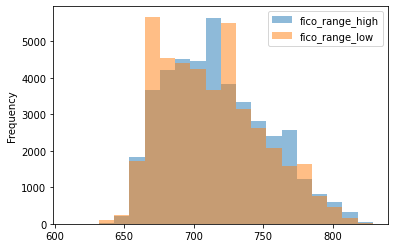

In [17]:
fico_range = ['fico_range_high','fico_range_low']
loan_data[fico_range].plot.hist(alpha=0.5,bins=20);

Having 4 columns for FICO score is redundant, and we want to replace them with a single column. `last_fico_range_low` and `last_fico_range_high` leak data from the future so we can ignore and drop those. We can take the average of `fico_range_low` and `fico_range_high` and store it as the column `mean_fico`. Then we can drop `fico_range_low` and `fico_range_high` as well.

In [18]:
loan_data['mean_fico'] = (loan_data['fico_range_high'] + loan_data['fico_range_low']) / 2

In [19]:
drop_cols = ['fico_range_low','fico_range_high','last_fico_range_low', 'last_fico_range_high']
loan_data = loan_data.drop(drop_cols, axis=1)

## 2.8 Choose a Target Column

Now, we decide which feature to use as a target column for modeling. We want to predict who will repay their loans and who will default, and we need to choose a column that reflects this. From the description of columns in `feature_desc`, it is apparent that `loan_status` is the only feature in our dataset describing this end result, so let’s use it as the target column.

The entries in this column are written in text, and they need to be converted into numerical values to better train our model. A complete list of unique values of `loan_status` is as follows:

In [20]:
loan_data["loan_status"].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

Recall that our goal is to build a model that can train on past loans and predict which future potential loans will be repaid and which ones won’t. From the above table, only the `Fully Paid` and `Charged Off` values describe the final outcome of a loan. The other values describe loans that are still ongoing, and even though some loans are late on payments (even if they are in `Default`), we can’t automatically assume they will be `Charged Off`.
We should use only samples where the `loan_status` column is `Fully Paid` or `Charged Off`.

We can treat the problem as binary classification, so we should remove all loans that don’t have `Fully Paid` or `Charged Off` as the loan’s status and encode the `Fully Paid` values as 1's and the `Charged Off` values as 0's.

Out of the 42,536 rows we have, we end up removing about 3000.

In [21]:
loan_data = loan_data[(loan_data["loan_status"] == "Fully Paid") |
(loan_data["loan_status"] == "Charged Off")]
map_dict = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
loan_data = loan_data.replace(map_dict)

Now we visualize the target column outcomes in a pie chart:

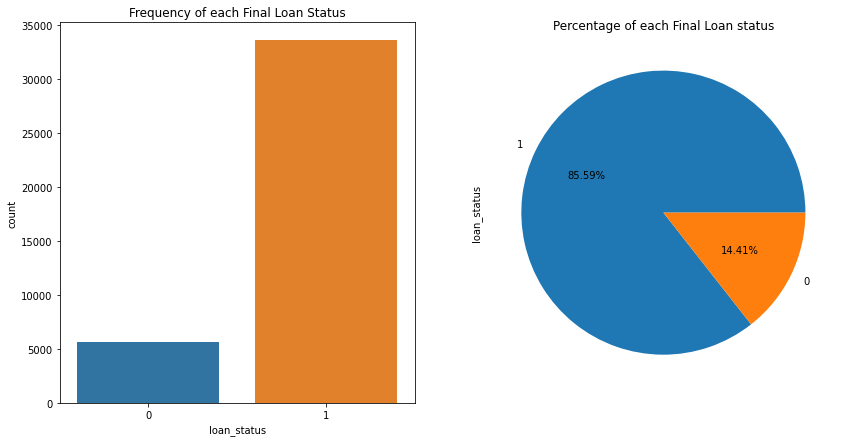

In [22]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=loan_data, ax=axs[0])
axs[0].set_title("Frequency of each Final Loan Status")
loan_data['loan_status'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Final Loan status")
plt.show()

## 2.9 Remove Constant Columns

In [23]:
loan_data = loan_data.loc[:,loan_data.apply(pd.Series.nunique) != 1]

In [24]:
for feature in loan_data.columns:
    if (len(loan_data[feature].unique()) < 4):
        print(loan_data[feature].value_counts())
        print()

 36 months    29096
 60 months    10143
Name: term, dtype: int64

Not Verified       16845
Verified           12526
Source Verified     9868
Name: verification_status, dtype: int64

1    33586
0     5653
Name: loan_status, dtype: int64

n    39238
y        1
Name: pymnt_plan, dtype: int64



The payment plan column `pymnt_plan` has two unique values, `y` and `n`, with `y` occurring only once. Let’s drop this column:



In [25]:
loan_data = loan_data.drop('pymnt_plan', axis=1)

Now we have the following number of columns:

In [26]:
print(loan_data.shape[1])

24


## 2.10 Handle Missing Values

### 2.10.1 Number Of Missing Values By Column (again)

Count the number of missing values in each column and sort them.

In [27]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#mushroom_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([loan_data.isnull().sum(), 100 * loan_data.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by=['count','%'],ascending=False)

,count,%
emp_length,1057,2.693749
pub_rec_bankruptcies,697,1.776294
revol_util,50,0.127424
title,11,0.028033
last_credit_pull_d,2,0.005097
loan_amnt,0,0.000000
term,0,0.000000
installment,0,0.000000
grade,0,0.000000
home_ownership,0,0.000000


Now most of the columns have 0 missing values. `title` has 9, `revol_util` has 48, and `pub_rec_bankruptcies` has 675. We remove columns (`pub_rec_bankruptcies`) where more than 1% (392) of the rows for that column are null. Then we remove the remaining rows containing null values. We will lose some data, but we will be able to keep some extra features (`title` and `revol_util`) to use for prediction because we keep those columns.

In [28]:
loan_data = loan_data.drop("pub_rec_bankruptcies",axis=1)
loan_data = loan_data.dropna()

### 2.10.2 Number Of Missing Values By Column (final)

Count the number of missing values in each column and sort them.

In [29]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#mushroom_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([loan_data.isnull().sum(), 100 * loan_data.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by=['count','%'],ascending=False)

,count,%
loan_amnt,0,0.0
term,0,0.0
installment,0,0.0
grade,0,0.0
emp_length,0,0.0
home_ownership,0,0.0
annual_inc,0,0.0
verification_status,0,0.0
loan_status,0,0.0
purpose,0,0.0


Now we have the following number of columns:

In [30]:
print(loan_data.shape[1])

23


We have the following number of rows:

In [31]:
print(loan_data.shape[0])

38123


## 2.11 Convert Categorical Features to Numeric

### 2.11.1 Categorical Features

In [32]:
#Use loan_data's `select_dtypes` method to select columns of dtype 'object'
loan_data.select_dtypes(include='object')

,term,grade,emp_length,home_ownership,verification_status,purpose,title,addr_state,earliest_cr_line,revol_util,last_credit_pull_d
0,36 months,B,10+ years,RENT,Verified,credit_card,Computer,AZ,Jan-1985,83.7%,Sep-2016
1,60 months,C,< 1 year,RENT,Source Verified,car,bike,GA,Apr-1999,9.4%,Sep-2016
2,36 months,C,10+ years,RENT,Not Verified,small_business,real estate business,IL,Nov-2001,98.5%,Sep-2016
3,36 months,C,10+ years,RENT,Source Verified,other,personel,CA,Feb-1996,21%,Apr-2016
5,36 months,A,3 years,RENT,Source Verified,wedding,My wedding loan I promise to pay back,AZ,Nov-2004,28.3%,Jan-2016
...,...,...,...,...,...,...,...,...,...,...,...
39781,36 months,A,4 years,MORTGAGE,Not Verified,home_improvement,Home Improvement,CO,Nov-1990,13.1%,Jun-2010
39782,36 months,C,3 years,RENT,Not Verified,credit_card,Retiring credit card debt,NC,Dec-1986,26.9%,Jul-2010
39783,36 months,A,< 1 year,MORTGAGE,Not Verified,debt_consolidation,MBA Loan Consolidation,MA,Oct-1998,19.4%,Jun-2007
39784,36 months,A,< 1 year,MORTGAGE,Not Verified,other,JAL Loan,MD,Nov-1988,0.7%,Jun-2007


### 2.11.2 Actual Numeric Feature

Of these columns, `revol_util` seems to actually be purely numeric. We remove the trailing percent signs:

In [33]:
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%').astype('float')

### 2.11.3 Features to Remove

`earliest_cr_line` and `last_credit_pull_d` columns contain date values that would require a good amount of feature engineering for them to be potentially useful. For now we plan to remove them.

We look at the unique value counts of six columns that appear to contain a limited set of possibilities for categorical values:

In [34]:
categoricals = ['home_ownership', 'grade','verification_status', 'emp_length', 'term', 'addr_state']
for feature in categoricals:
    print(feature,':')
    print(loan_data.select_dtypes(include='object')[feature].value_counts(),'\n')

home_ownership :
RENT        18271
MORTGAGE    16945
OWN          2808
OTHER          96
NONE            3
Name: home_ownership, dtype: int64 

grade :
B    11545
A     9675
C     7801
D     5086
E     2715
F      993
G      308
Name: grade, dtype: int64 

verification_status :
Not Verified       16391
Verified           12070
Source Verified     9662
Name: verification_status, dtype: int64 

emp_length :
10+ years    8715
< 1 year     4542
2 years      4344
3 years      4050
4 years      3385
5 years      3243
1 year       3207
6 years      2198
7 years      1738
8 years      1457
9 years      1244
Name: emp_length, dtype: int64 

term :
 36 months    28234
 60 months     9889
Name: term, dtype: int64 

addr_state :
CA    6833
NY    3657
FL    2741
TX    2639
NJ    1802
IL    1476
PA    1460
VA    1359
GA    1340
MA    1292
OH    1167
MD    1020
AZ     819
WA     796
CO     755
NC     747
CT     719
MI     684
MO     653
MN     586
NV     473
SC     461
WI     433
OR     427
AL     42

These look mostly fine except for `addr_state`, which has too many values. We plan to drop `addr_state`.

In [35]:
free_forms = ['purpose','title']
for feature in free_forms:
    print(feature,':')
    print(loan_data.select_dtypes(include='object')[feature].value_counts(),'\n')

purpose :
debt_consolidation    17965
credit_card            4944
other                  3764
home_improvement       2852
major_purchase         2105
small_business         1749
car                    1483
wedding                 927
medical                 663
moving                  556
house                   359
vacation                349
educational             312
renewable_energy         95
Name: purpose, dtype: int64 

title :
Debt Consolidation                        2102
Debt Consolidation Loan                   1635
Personal Loan                              632
Consolidation                              495
debt consolidation                         476
                                          ... 
A New Start                                  1
Tired of C.C. Companies getting rich         1
Getting Rid of Credit Cards                  1
Newlyweds Working to Financial Freedom       1
Sedor                                        1
Name: title, Length: 19021, dtype: int64 



The `title` column has way too many distinct possible values, whereas the `purpose` column has fewer unique values and is cleaner. We plan to keep the `purpose` column but drop the `title` column.

Finally, let's drop the columns we decided to drop:

In [36]:
drop_cols = ['last_credit_pull_d','addr_state','title','earliest_cr_line']
loan_data = loan_data.drop(drop_cols,axis=1)

### 2.11.4 Ordinal Valued Features

The following features have a natural order and can be sorted in increasing or decreasing order: `grade` and `emp_length`. We replace them with integer values:

In [37]:
map_dict = {
"emp_length": {
"10+ years": 10,
"9 years": 9,
"8 years": 8,
"7 years": 7,
"6 years": 6,
"5 years": 5,
"4 years": 4,
"3 years": 3,
"2 years": 2,
"1 year": 1,
"< 1 year": 0,
"n/a": 0
},
"grade":{
"A": 1,
"B": 2,
"C": 3,
"D": 4,
"E": 5,
"F": 6,
"G": 7
}
}
loan_data = loan_data.replace(map_dict)

### 2.11.5 Nominal Valued Features

The following features are normal categorical values that have no natural order: `home_ownership`, `verification_status`, `purpose`, and `term`. We one-hot encode them using OneHotEncoder:

In [38]:
loan_data = pd.DataFrame(loan_data.to_numpy(), columns=loan_data.columns)
nominals = ["home_ownership", "verification_status", "purpose", "term"]
enc = OneHotEncoder(drop='if_binary')
arr = enc.fit_transform(loan_data[nominals]).toarray()
one_hot_all = pd.DataFrame(arr, columns=enc.get_feature_names(loan_data[nominals].columns))
loan_data = pd.concat([loan_data, one_hot_all], axis=1)
loan_data = loan_data.drop(nominals, axis=1)

### 2.11.6 Final Result

In [39]:
loan_data.head()

,loan_amnt,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months
0,5000,162.87,2,10,24000,1,27.65,0,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2500,59.83,3,0,30000,0,1,0,5,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2400,84.33,3,10,12252,1,8.72,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10000,339.31,3,10,49200,1,20,0,1,10,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5000,156.46,1,3,36000,1,11.2,0,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38123 entries, 0 to 38122
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38123 non-null  object 
 1   installment                          38123 non-null  object 
 2   grade                                38123 non-null  object 
 3   emp_length                           38123 non-null  object 
 4   annual_inc                           38123 non-null  object 
 5   loan_status                          38123 non-null  object 
 6   dti                                  38123 non-null  object 
 7   delinq_2yrs                          38123 non-null  object 
 8   inq_last_6mths                       38123 non-null  object 
 9   open_acc                             38123 non-null  object 
 10  pub_rec                              38123 non-null  object 
 11  revol_bal                   

In [41]:
loan_data.shape

(38123, 38)

## 2.12 Save data

Save this to your data directory, separately. Note that you were provided with the data in `raw_data` and you should saving derived data in a separate location. This guards against overwriting our original data.

In [42]:
# save the data to a new csv file
datapath = '../data'
save_file(loan_data, 'loan_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/loan_data_cleaned.csv"


## 2.13 Summary

We started with 42538 rows and 115 columns of loan data. We dropped many columns and some rows with missing or useless information. We did data wrangling and exploratory data analysis. The target feature to predict is `loan_status`. We ended up with 38123 rows and 38 columns after cleaning the mushroom data and converting the categorical data to numeric.